<a href="https://colab.research.google.com/github/3B032007/2025_ML_hws/blob/main/hw4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

# 1、讀入 CIFAR-10 數據集
CIFAR-10 是一個小尺吋（32x32）彩色圖片資料集，其中，訓練集包含了 50000 張大小為 32x32 的彩色圖片；測試集包含了 10000 張大小為 32x32 的彩色圖片。CIFAR-10 的圖片資料可分為以下 10 個種類：
* 飛機 (airplan)
* 交通工具 (automobile)
* 鳥 (bird)
* 貓 (cat)
* 鹿 (deer)
* 狗 (dog)
* 青蛙 (frog)
* 馬 (horse)
* 船 (ship)
* 卡車 (truck)

In [16]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2、資料整理

資料尺寸與通道數（Channel）

由於 CNN 模型的輸入資料必須是圖片，所以我們需要注意一張圖有多少個 channel。


因為CIFAR-10資料集的資料為彩色圖片，每一個像素點，其實包含了紅色（Red）、綠色（Green）以及藍色（Blue）三原色的強度，所以每一張圖有三個 channel，以及代表三種顏色的強度。

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
y_train.shape

(50000, 1)

In [19]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
print(f"資料的最小值: {np.min(x_train)}")
print(f"資料的最大值: {np.max(x_train)}")

資料的最小值: 0
資料的最大值: 255


In [21]:
print(f"資料的最小值: {np.min(x_test)}")
print(f"資料的最大值: {np.max(x_test)}")

資料的最小值: 0
資料的最大值: 255


In [22]:
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
y_train.shape

(50000, 10)

In [24]:
# 資料類別標籤
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

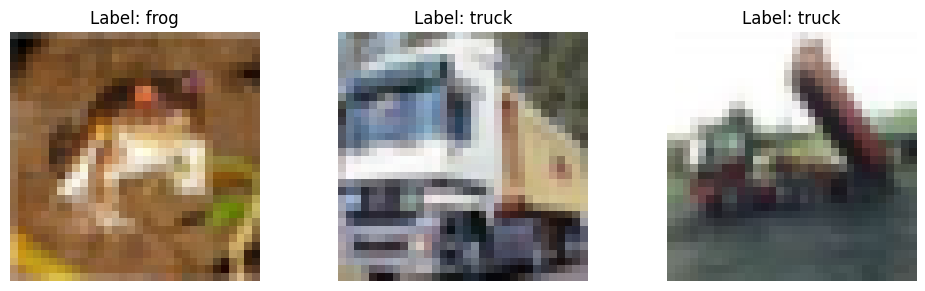

In [25]:
# 顯示三張訓練圖片與其標籤
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(x_train[i])
    label_index = np.argmax(y_train[i])  # 從 one-hot 還原 label 編號
    plt.title(f"Label: {class_names[label_index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3、建立神經網路模型

In [26]:
model = Sequential()

In [27]:
# 第1層：Conv2D (32個 Filter, 5x5, ReLU)
# 參數：32 × (5×5×3) + 32 = 2432
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)))

In [28]:
# 第2層：Dropout
model.add(Dropout(0.25))

In [29]:
# 第3層：MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))  # 輸出: (16, 16, 32)

In [30]:
# 第4層：Conv2D (64個 Filter, 3x3, ReLU)
# 參數：64 × (3×3×32) + 64 = 18496
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

In [31]:
# 第5層：Dropout
model.add(Dropout(0.25))

In [32]:
# 第6層：MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))  # 輸出: (8, 8, 64)

In [33]:
# 第7層：Flatten
model.add(Flatten())  # 輸出: 8×8×64 = 4096

In [34]:
# 第8層：Dropout
model.add(Dropout(0.25))

In [35]:
# 第9層：Dense 1024 neurons
# 參數：4096 × 1024 + 1024 = 4,195,328
model.add(Dense(1024, activation='relu'))

In [36]:
# 第10層：Dropout
model.add(Dropout(0.25))

In [37]:
# 第11層：Dense 10 neurons (Softmax)
# 參數：1024 × 10 + 10 = 10,250
model.add(Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,226,506 (16.12 MB)

 Trainable params: 4,226,506 (16.12 MB)

 Non-trainable params: 0 (0.00 B)

# 4、組裝神經網路

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [40]:
train_history =model.fit( x_train, y_train ,validation_split=0.2,epochs=20 , batch_size=128,verbose=2)

Epoch 1/20
313/313 - 15s - 48ms/step - accuracy: 0.4463 - loss: 1.5356 - val_accuracy: 0.5656 - val_loss: 1.3055
Epoch 2/20
313/313 - 2s - 8ms/step - accuracy: 0.5786 - loss: 1.1890 - val_accuracy: 0.6219 - val_loss: 1.1835
Epoch 3/20
313/313 - 2s - 8ms/step - accuracy: 0.6318 - loss: 1.0463 - val_accuracy: 0.6411 - val_loss: 1.0833
Epoch 4/20
313/313 - 2s - 8ms/step - accuracy: 0.6757 - loss: 0.9240 - val_accuracy: 0.6803 - val_loss: 0.9874
Epoch 5/20
313/313 - 2s - 8ms/step - accuracy: 0.7117 - loss: 0.8233 - val_accuracy: 0.6971 - val_loss: 0.9447
Epoch 6/20
313/313 - 3s - 9ms/step - accuracy: 0.7426 - loss: 0.7318 - val_accuracy: 0.7081 - val_loss: 0.8855
Epoch 7/20
313/313 - 5s - 16ms/step - accuracy: 0.7727 - loss: 0.6467 - val_accuracy: 0.7168 - val_loss: 0.8446
Epoch 8/20
313/313 - 2s - 7ms/step - accuracy: 0.8044 - loss: 0.5558 - val_accuracy: 0.7266 - val_loss: 0.8314
Epoch 9/20
313/313 - 2s - 8ms/step - accuracy: 0.8301 - loss: 0.4890 - val_accuracy: 0.7227 - val_loss: 0.810

# 5、以折線圖顯示訓練過程的loss & accuracy

In [41]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

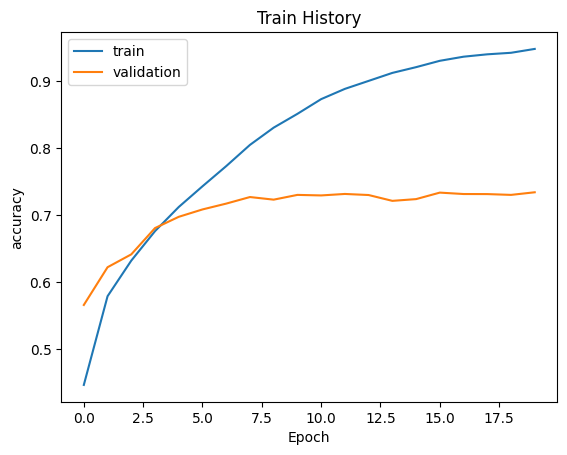

In [42]:
show_train_history(train_history,'accuracy','val_accuracy')

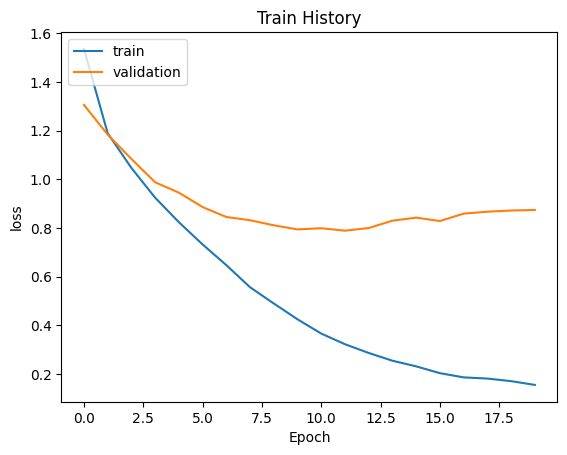

In [43]:
# 損失誤差loss
show_train_history(train_history,'loss','val_loss')

# 6、評估模型準確率

In [44]:
scores = model.evaluate(x_test, y_test)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7279 - loss: 0.8909

accuracy= 0.7222999930381775


# 7、進行預測

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


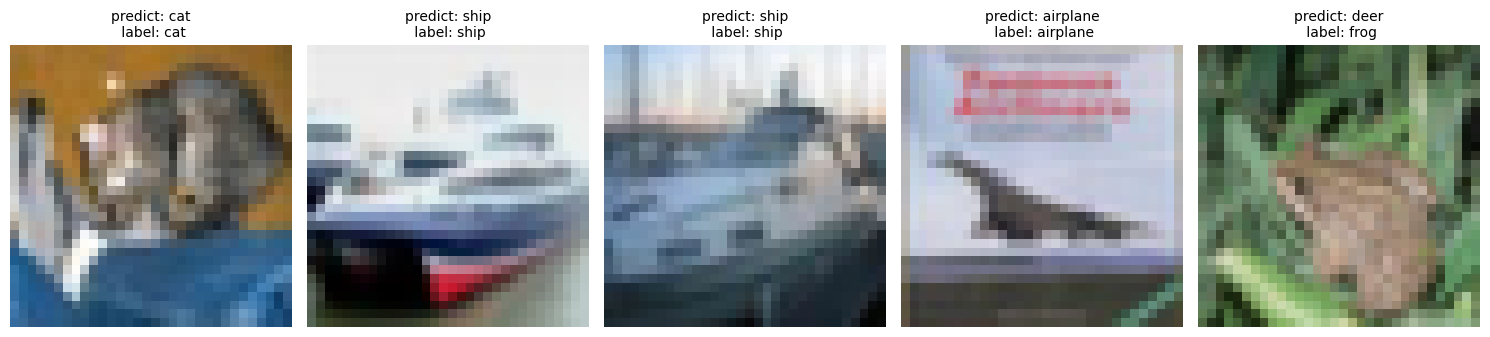

In [45]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# 顯示前 5 張圖片的預測結果與真實標籤
plt.figure(figsize=(15, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    pred_label = class_names[y_pred_labels[i]]
    true_label = class_names[y_true_labels[i]]
    plt.title(f"predict: {pred_label}\n label: {true_label}", fontsize=10)
plt.tight_layout()
plt.show()

# 8、混淆矩陣(Confusion matrix)

In [46]:
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(x_test), axis=1)

pd.crosstab(y_true_labels,y_pred_labels,rownames=['label'],colnames=['predict'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,763,10,38,26,19,2,13,9,87,33
1,22,782,10,17,5,4,11,1,39,109
2,58,3,578,76,136,58,49,15,20,7
3,24,8,65,569,85,133,63,22,17,14
4,18,1,43,74,748,23,39,37,15,2
5,8,2,35,215,78,584,29,30,14,5
6,3,4,38,70,51,19,798,5,6,6
7,10,1,35,49,91,50,7,741,4,12
8,37,25,12,20,12,7,4,1,864,18


# 9、儲存完整模型

In [48]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks'

model.save('hw4-2.keras')

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# 10、interact_manual

In [49]:
from ipywidgets import interact_manual

y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(x_test), axis=1)

def test(test):
  plt.imshow(x_test[test], cmap='Greys')
  print('神經網路判斷為：', str(class_names[y_pred_labels[test]]))


# interact_manual(test, test=(0, 9999))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
